### ΧΡΙΣΤΙΝΑ ΤΣΑΚΑΝΙΚΑ ΑΜ:03117012 8ο ΕΞΑΜΗΝΟ ΗΜΜΥ

### Άσκηση 1

#### Eρώτημα 1

To να κάνουμε Ν ταξίδια γύρω από την κατάσταση 1 είναι ισοδύναμο με το να εκκινήσουμε Ν αλυσίδες από την κατάσταση 1, λόγω της Μαρκοβιανής ιδιότητας της απώλειας μνήμης. Συνεπώς, αφού δε μας ενδιαφέρει το παρελθόν, η εκκίνηση νέου ταξιδιού από την 1 είναι ισοδύναμη με την εκκίνηση νέας αλυσίδας από την 1.

#### Eρώτημα 2

In [28]:
from simple_markov_chain_lib import markov_chain
import statistics as stat

## Build Markov Chain
markov_table = {
    1: {2: 0.5, 3: 0.5},
    2: {1: 1/3, 4: 2/3},
    3: {3: 0.8, 4: 0.2},
    4: {1: 0.6, 4: 0.4}
}

init_dist = {1: 1.0} #the chain starts from state 1 since we are interested in excursions around state 1.

mc = markov_chain(markov_table, init_dist)

N = 100_000

#Initialize the dictionary "visits". Every state is a key of this dictionary, with value 0
visits = {state: 0 for state in (1, 2, 3, 4)} 
total_visits = [[],[],[],[]]
mc.start()
completed = 0
T = 0
Ts=[]
##Simulate N excursions. Every time we complete an excursion we increase completed by 1.
while completed < N:
    visits[mc.running_state] += 1
    mc.move()
    T+=1
    if mc.running_state == 1:
        total_visits[0].append(visits[1])
        total_visits[1].append(visits[2])
        total_visits[2].append(visits[3])
        total_visits[3].append(visits[4])
        visits = {state: 0 for state in (1, 2, 3, 4)} 
        completed +=1
        Ts.append(T)
        T = 0
        init_dist = {1: 1.0}
        mc = markov_chain(markov_table, init_dist)
        mc.start()
        
print("Expected Visits starting from 1:")
print('1:', (1/stat.mean(Ts))*stat.mean(total_visits[0]))
print('2:', (1/stat.mean(Ts))*stat.mean(total_visits[1]))
print('3:', (1/stat.mean(Ts))*stat.mean(total_visits[2]))
print('4:', (1/stat.mean(Ts))*stat.mean(total_visits[3]))


Expected Visits starting from 1:
1: 0.18584666163641703
2: 0.09325971327577043
3: 0.46313545619780033
4: 0.25775816889001224


Από την επίλυση του συστήματος έχουμε ότι:
$π1(1) = 18/97 = 0.18556701$,
$π1(2) = 9/97 = 0.09278350$,
$π1(3) = 45/97 = 0.463917525$,
$π1(4) = 25/97 = 0.25773195$.

Παρατηρούμε πως ο υπολογισμός μας προσεγγίζει ικανοποιητικά το θεωρητικό αποτέλεσμα.

#### Eρώτημα 3

Οι αλλαγές που κάνουμε είναι στις γραμμές "init_dist = {1: 1.0}" και  "if mc.running_state == 1", όπου και στις δύο περιπτώσεις αντικαθιστούμε το 1 με 2,3,4 για κάθε περίπτωση. Οι αλλαγές που παρατηρούνται στις κατανομές δεν είναι σημαντικές εφόσον παρατηρούνται από το πέμπτο δεκαδικό ψηφίο και μετά. Αυτό ήταν αναμενόμενο, αφού στο προηγούμενο ερώτημα, κατά την επίλυση του συστήματος για την εύρεση των αναλλοίωτων κατανομών, προκύπτει μόνο μια τετράδα λύσεων. Αυτό αποδεικνύει την ύπαρξη μοναδικής αναλλοίωτης κατανομής. Άρα οι $\pi_2$, $\pi_3$, $\pi_4$, είναι όμοιες της $\pi_1$.

### Άσκηση 2

In [55]:
from numpy import random, pi

# p = (4π/3)/8 => p = π/6

N = 10**6  # number of required points
Ntrials, Nhits = 0, 0
acc_x, acc_y, acc_z = [], [], []  # accepted x, y, z
rej_x, rej_y, rej_z = [], [], []  # rejected x, y, z

# Rejection Sampling
while Nhits < N:
    Ntrials += 1
    x, y, z = random.uniform(-1, 1, 3)
    if x**2 + y**2 + z**2 < 1:
        acc_x.append(x)
        acc_y.append(y)
        acc_z.append(z)
        Nhits += 1
    else:
        rej_x.append(x)
        rej_y.append(y)
        rej_z.append(z)

print("Total number of samples drawn %d" % Ntrials)
print("Number of samples in the disk %d" % N)


Total number of samples drawn 1908438
Number of samples in the disk 1000000


#### Eρώτημα 1 

In [56]:
print("Αριθμητική εκτίμηση του p = 4π/3 με Monte Carlo estimator:", ( 8*Nhits / Ntrials))
print("Θεωρητική τιμή του 4π/3:", 4*pi/3)
print("Σχετικό σφάλμα της εκτίμησης: %.5f%%" % (100 * abs(1- (6*Nhits)/(pi* Ntrials))))

Αριθμητική εκτίμηση του p = 4π/3 με Monte Carlo estimator: 4.191909823635874
Θεωρητική τιμή του 4π/3: 4.1887902047863905
Σχετικό σφάλμα της εκτίμησης: 0.07448%


#### Ερώτημα 2

In [57]:
# Parameters
N = 10_000  # number of required points
Ntrials, Nhits = 0, 0
acc_x, acc_y = [], []  # accepted x, y
rej_x, rej_y = [], []  # rejected x, y

vectors = []
# Rejection Sampling
while Nhits < N:
    Ntrials += 1
    x, y = random.uniform(-1, 1, 2)
    if (x**2 + y**2)**2 < 2*abs(x*y):
        acc_x.append(x)
        acc_y.append(y)
        Nhits += 1
        vectors.append(abs(x+y))
    else:
        rej_x.append(x)
        rej_y.append(y)

print("Total number of samples drawn %d" % Ntrials)
print("Number of samples in the disk %d" % N)

Total number of samples drawn 19674
Number of samples in the disk 10000


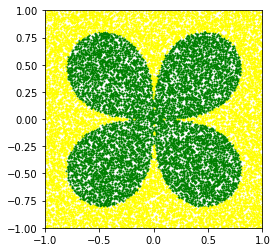

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.scatter(acc_x, acc_y, color = 'green', s = 1) # parameter s determines the size of each dot in the scatter plot
plt.scatter(rej_x, rej_y, color = 'yellow', s = 1)

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal')  # set aspect ratio 1:1

plt.show()

Τα σημεία που απορρίφθηκαν αποδίδονται με κίτρινο, ενώ τα αποδεκτά με πράσινο.

In [59]:
print("Πλήθος δειγμάτων στο  𝑆  που χρειάστηκαν για την παραγωγή  𝑁  δειγμάτων στον λημνίσκο  𝐿: %d" % Ntrials)

Πλήθος δειγμάτων στο  𝑆  που χρειάστηκαν για την παραγωγή  𝑁  δειγμάτων στον λημνίσκο  𝐿: 19674


#### Eρώτημα 3

In [60]:
# p = E/4 = Nhits/Ntrials => E = 4*Nhits/Ntrials
print('Το ζητούμενο εμβαδό ισούται με:', 4*Nhits/Ntrials)
print('Το ζητούμενο ολοκλήρωμα ισούται με:',stat.mean(vectors)*(4*Nhits/Ntrials))

Το ζητούμενο εμβαδό ισούται με: 2.033140185015757
Το ζητούμενο ολοκλήρωμα ισούται με: 1.0062586335785106
